In [66]:
# import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [67]:
# load data
sales_data = pd.read_csv("/content/drive/MyDrive/AdventureWorks/AdventueWorks Final Data.csv")
sales_data

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SKU Type,Discount Price,Region,Country,Continent,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Full Name,Domain Name
0,1/1/2020,9/21/2019,SO45080,332,14657,1,1,1,1,Bikes,2,Road Bikes,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.10,BK-R50B,629.19,Northwest,United States,North America,11/11/1958,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works
1,1/9/2022,10/1/2021,SO61768,352,14657,1,1,1,1,Bikes,1,Mountain Bikes,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all l...,Silver,U,1117.86,2071.42,BK-M68S,1864.28,Northwest,United States,North America,11/11/1958,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works
2,1/9/2022,12/20/2021,SO61768,215,14657,1,3,1,4,Accessories,31,Helmets,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,NaN,12.03,33.64,HL-U509,30.28,Northwest,United States,North America,11/11/1958,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works
3,1/9/2022,11/22/2021,SO61768,485,14657,1,2,2,4,Accessories,30,Fenders,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,NaN,NaN,8.22,21.98,FE-6654,19.78,Northwest,United States,North America,11/11/1958,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works
4,2/6/2020,10/12/2019,SO45383,332,14734,1,1,1,1,Bikes,2,Road Bikes,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.10,BK-R50B,629.19,Northwest,United States,North America,11/11/1953,M,M,kevin38@adventure-works.com,30000,1,Bachelors,Skilled Manual,Y,Mr. Kevin Edwards,Adventure Works
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,6/19/2022,5/30/2022,SO73288,477,15324,2,5,2,4,Accessories,28,Bottles and Cages,WB-H098,Water Bottle - 30 oz.,Water Bottle,AWC logo water bottle - holds 30 oz; leak-proof.,NaN,NaN,1.87,4.99,WB-H098,4.49,Northeast,United States,North America,5/21/1948,M,F,renee14@adventure-works.com,40000,2,High School,Professional,N,Mrs. Renee Serrano,Adventure Works
56042,6/19/2022,5/22/2022,SO73288,478,15324,2,3,1,4,Accessories,28,Bottles and Cages,BC-M005,Mountain Bottle Cage,Mountain Bottle Cage,Tough aluminum cage holds bottle securly on to...,NaN,NaN,3.74,9.99,BC-M005,8.99,Northeast,United States,North America,5/21/1948,M,F,renee14@adventure-works.com,40000,2,High School,Professional,N,Mrs. Renee Serrano,Adventure Works
56043,6/19/2022,5/28/2022,SO73288,528,15324,2,1,2,4,Accessories,37,Tires and Tubes,TT-M928,Mountain Tire Tube,Mountain Tire Tube,Self-sealing tube.,NaN,NaN,1.87,4.99,TT-M928,4.49,Northeast,United States,North America,5/21/1948,M,F,renee14@adventure-works.com,40000,2,High School,Professional,N,Mrs. Renee Serrano,Adventure Works
56044,6/19/2022,5/26/2022,SO73288,485,15324,2,2,3,4,Accessories,30,Fenders,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,NaN,NaN,8.22,21.98,FE-6654,19.78,Northeast,United States,North America,5/21/1948,M,F,renee14@adventure-works.com,40000,2,High School,Professional,N,Mrs. Renee Serrano,Adventure Works


In [68]:
# looking for missing values
missing_values_summary = sales_data.isnull().sum()
missing_values_summary

,0
OrderDate,0
StockDate,0
OrderNumber,0
ProductKey,0
CustomerKey,0
TerritoryKey,0
OrderLineItem,0
OrderQuantity,0
ProductCategoryKey,0
CategoryName,0


In [69]:
# Handling missing data:
# for 'ProductColor' and 'ProductStyle', we'll use the placeholder 'Unknown'
sales_data['ProductColor'].fillna('Unknown', inplace=True)
sales_data['ProductStyle'].fillna('Unknown', inplace=True)

# for Gender, we'll impute using the most frequent
gender_mode = sales_data['Gender'].mode()[0]
sales_data['Gender'].fillna(gender_mode, inplace=True)

# re-check missing values
updated_missing_values = sales_data.isnull().sum()
updated_missing_values

<ipython-input-69-24db588bb499>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['ProductColor'].fillna('Unknown', inplace=True)
<ipython-input-69-24db588bb499>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
OrderDate,0
StockDate,0
OrderNumber,0
ProductKey,0
CustomerKey,0
TerritoryKey,0
OrderLineItem,0
OrderQuantity,0
ProductCategoryKey,0
CategoryName,0


In [70]:
# Prepare data by calculating Purchase Frequency and Total Spend per customer.

# Grouping by CustomerKey to get Purchase Frequency and Total Spend
customer_data = sales_data.groupby('CustomerKey').agg({'OrderNumber': 'nunique',  # Purchase Frequency
    'ProductPrice': 'sum', # Total Spend
    'ProductCategoryKey': lambda x: x.mode()[0],  # Most common product category purchased
    'ProductKey': 'nunique'  # Number of distinct products purchased

}).reset_index()

# Renaming the columns
customer_data.columns = ['CustomerKey', 'PurchaseFrequency', 'TotalSpend', 'MostPurchasedProduct', 'DistinctProducts']

# Merging the customer_data back with other relevant columns
customer_info = sales_data[['CustomerKey', 'Region']].drop_duplicates()
customer_data = customer_data.merge(customer_info, on='CustomerKey', how='left')

In [71]:
customer_data

,CustomerKey,PurchaseFrequency,TotalSpend,MostPurchasedProduct,DistinctProducts,Region
0,11000,2,4600.43,4,7,Australia
1,11001,2,2758.63,4,9,Australia
2,11002,2,4466.81,1,3,Australia
3,11003,2,4493.06,4,8,Australia
4,11004,2,4546.10,4,5,Australia
...,...,...,...,...,...,...
17411,29479,1,2049.10,1,1,France
17412,29480,1,2440.34,4,5,United Kingdom
17413,29481,1,3374.99,1,1,Germany
17414,29482,1,2049.10,1,1,France


In [72]:
# encoding column region by using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_region = OneHotEncoder()
region_encoder = OneHotEncoder_region.fit_transform(customer_data[['Region']])
region_encoder

<17416x10 sparse matrix of type '<class 'numpy.float64'>'
	with 17416 stored elements in Compressed Sparse Row format>

In [73]:
OneHotEncoder_region.get_feature_names_out(['Region'])  # getting the columns names

array(['Region_Australia', 'Region_Canada', 'Region_Central',
       'Region_France', 'Region_Germany', 'Region_Northeast',
       'Region_Northwest', 'Region_Southeast', 'Region_Southwest',
       'Region_United Kingdom'], dtype=object)

In [74]:
# creating dataframe for the encoded columns
region_encoder_df = pd.DataFrame(region_encoder.toarray(), columns=OneHotEncoder_region.get_feature_names_out(['Region']))
region_encoder_df

,Region_Australia,Region_Canada,Region_Central,Region_France,Region_Germany,Region_Northeast,Region_Northwest,Region_Southeast,Region_Southwest,Region_United Kingdom
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
17411,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17412,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
17413,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
17414,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [75]:
# Combine all the columns with customer data
customer_data_encoded = pd.concat([customer_data.drop(['Region','CustomerKey'], axis=1), region_encoder_df], axis=1)
customer_data_encoded

,PurchaseFrequency,TotalSpend,MostPurchasedProduct,DistinctProducts,Region_Australia,Region_Canada,Region_Central,Region_France,Region_Germany,Region_Northeast,Region_Northwest,Region_Southeast,Region_Southwest,Region_United Kingdom
0,2,4600.43,4,7,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,2758.63,4,9,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,4466.81,1,3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2,4493.06,4,8,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2,4546.10,4,5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,1,2049.10,1,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17412,1,2440.34,4,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
17413,1,3374.99,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
17414,1,2049.10,1,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
import pickle
with open('/content/drive/MyDrive/AdventureWorks/OneHotEncoder_region.pkl', 'wb') as file:
  pickle.dump(OneHotEncoder_region, file)

In [77]:
# scaling columns PurchaseFrequency and TotalSpend
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data_encoded[['TotalSpend', 'PurchaseFrequency', 'MostPurchasedProduct', 'DistinctProducts']] = scaler.fit_transform(customer_data_encoded[['TotalSpend', 'PurchaseFrequency', 'MostPurchasedProduct', 'DistinctProducts']])
customer_data_scaled = pd.DataFrame(customer_data_encoded, columns=customer_data_encoded.columns)
customer_data_scaled

,PurchaseFrequency,TotalSpend,MostPurchasedProduct,DistinctProducts,Region_Australia,Region_Canada,Region_Central,Region_France,Region_Germany,Region_Northeast,Region_Northwest,Region_Southeast,Region_Southwest,Region_United Kingdom
0,0.54,1.69,0.81,2.04,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.54,0.71,0.81,3.09,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.54,1.62,-1.38,-0.08,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.54,1.63,0.81,2.57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.54,1.66,0.81,0.98,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,-0.43,0.34,-1.38,-1.13,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17412,-0.43,0.54,0.81,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
17413,-0.43,1.04,-1.38,-1.13,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
17414,-0.43,0.34,-1.38,-1.13,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [78]:
with open('/content/drive/MyDrive/AdventureWorks/scaler.pkl', 'wb') as file:
  pickle.dump(scaler,file)

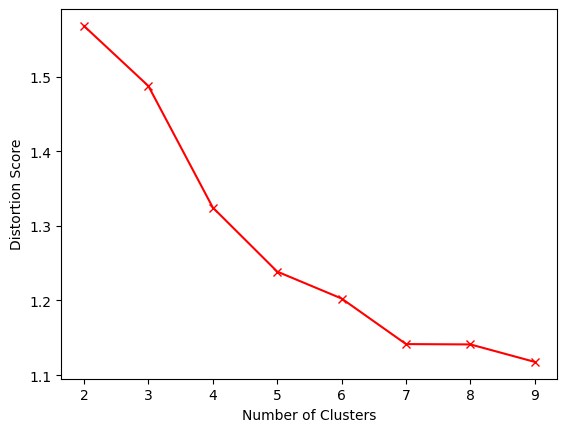

In [79]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
n_clusters = range(2,10)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(customer_data_scaled)
    distortions.append(sum(np.min(cdist(customer_data_scaled,kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1))/customer_data_scaled.shape[0])

# Plot the elbow
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = range(2,11)
for k in n_clusters:
    # Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(customer_data_scaled)
    y_kmeans = kmeans_model.predict(customer_data_scaled)

    silhouette_avg = silhouette_score(customer_data_scaled, y_kmeans)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3525822184327116
For n_clusters = 3 The average silhouette_score is : 0.1940693469534706
For n_clusters = 4 The average silhouette_score is : 0.27060791163188325
For n_clusters = 5 The average silhouette_score is : 0.21401243578652204
For n_clusters = 6 The average silhouette_score is : 0.21967986088231292
For n_clusters = 7 The average silhouette_score is : 0.23707506963249614
For n_clusters = 8 The average silhouette_score is : 0.18651752729731993
For n_clusters = 9 The average silhouette_score is : 0.17995571024229898
For n_clusters = 10 The average silhouette_score is : 0.18970361839727737


In [81]:
# k-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
customer_data_scaled['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# calculating the mean values of each feature for each cluster
cluster_analysis = customer_data_scaled.groupby('Cluster').mean()
cluster_analysis

,PurchaseFrequency,TotalSpend,MostPurchasedProduct,DistinctProducts,Region_Australia,Region_Canada,Region_Central,Region_France,Region_Germany,Region_Northeast,Region_Northwest,Region_Southeast,Region_Southwest,Region_United Kingdom
Cluster,,,,,,,,,,,,,,
0,0.92,1.34,-0.76,0.85,0.35,0.10,0.00,0.09,0.10,0.00,0.10,0.00,0.15,0.11
1,-0.32,-0.46,0.26,-0.29,0.15,0.08,0.00,0.10,0.10,0.00,0.20,0.00,0.27,0.10


In [82]:
from joblib import dump
dump(kmeans,'/content/drive/MyDrive/AdventureWorks/kmeans.joblib')

['/content/drive/MyDrive/AdventureWorks/kmeans.joblib']

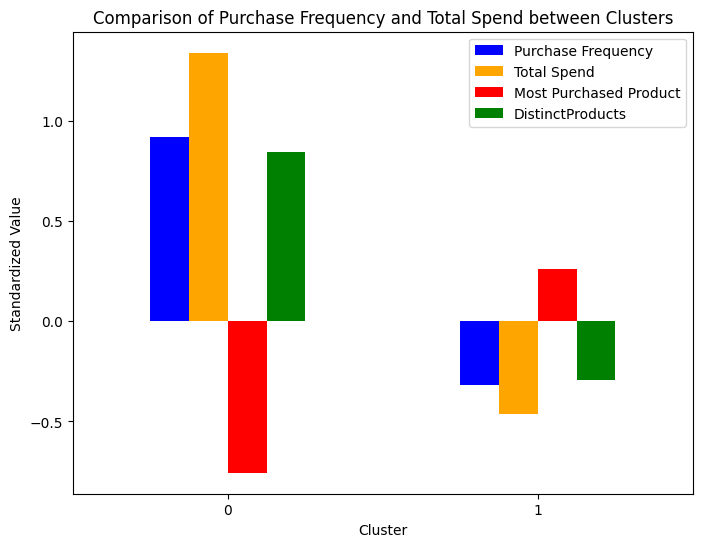

In [83]:
# Extracting the relevant columns for visualization
cluster_means = cluster_analysis[['PurchaseFrequency', 'TotalSpend', 'MostPurchasedProduct', 'DistinctProducts']]

# plotting a bar chart
cluster_means.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange','red', 'green'])
plt.title('Comparison of Purchase Frequency and Total Spend between Clusters')
plt.xlabel('Cluster')
plt.ylabel('Standardized Value')
plt.xticks(rotation=0)
plt.legend(['Purchase Frequency', 'Total Spend','Most Purchased Product', 'DistinctProducts'])
plt.show()

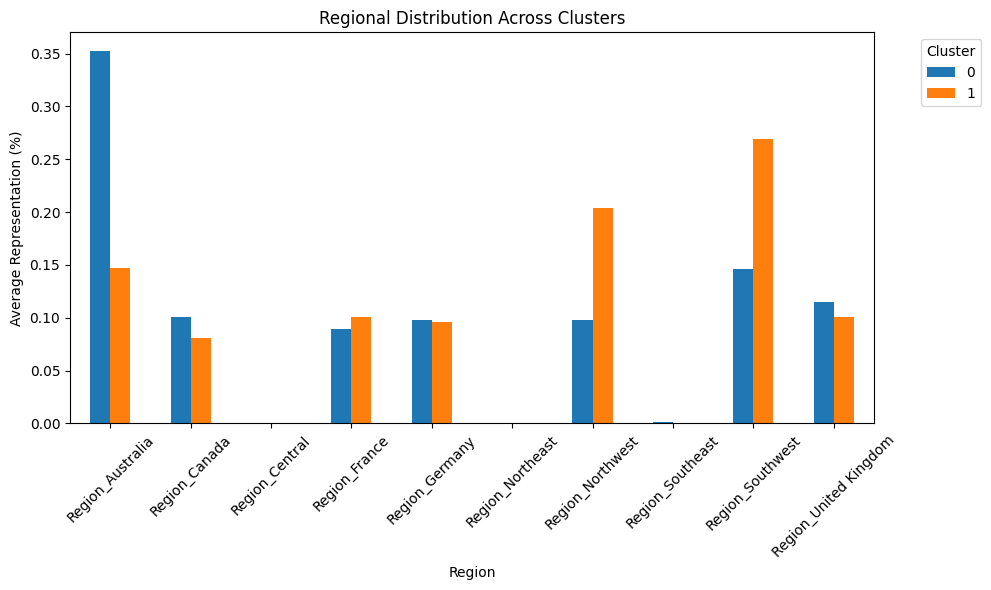

In [84]:
# regional distribution across clusters
region_columns = [col for col in customer_data_scaled.columns if col.startswith('Region_')]

# grouping data by clusters and sum all the regions if one-hot encoded columns
region_distribution = customer_data_scaled.groupby('Cluster')[region_columns].mean()

# plotting the regional distribution
region_distribution.T.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Regional Distribution Across Clusters')
plt.xlabel('Region')
plt.ylabel('Average Representation (%)')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

In [85]:
sales_data['DiscountMargin'] = ((sales_data['ProductPrice'] - sales_data['Discount Price']) / sales_data['ProductPrice']) * 100

# Replace negative or NaN values in DiscountMargin with 0 (if no discount was offered)
sales_data['DiscountMargin'] = sales_data['DiscountMargin'].fillna(0)

repeat_purchase_data = sales_data.groupby('CustomerKey').agg({
    'OrderNumber': 'nunique',  # Count of unique orders
    'DiscountMargin': 'mean',  # Average discount margin received by the customer
    'ProductPrice': 'sum', # Total Spend
    'Region': 'first',  # Retain region for each customer
    'ProductCategoryKey': lambda x: x.mode()[0],  # Most common product category
    'ProductKey': 'nunique',  # Number of distinct products purchased
    'OrderDate': 'min',  # First order date
    'BirthDate': 'first',  # Customer birthdate
    'AnnualIncome': 'first',
}).reset_index()

repeat_purchase_data.columns = ['CustomerKey', 'PurchaseFrequency', 'DiscountMargin', 'TotalSpend', 'Region',
                                'MostPurchasedProduct', 'DistinctProducts','OrderDate', 'BirthDate', 'AnnualIncome']

# Creating a 'RepeatPurchase' flag: 1 if customer has >1 unique orders, else 0
repeat_purchase_data['RepeatPurchase'] = (repeat_purchase_data['PurchaseFrequency'] > 1).astype(int)

# Convert BirthDate to Age
repeat_purchase_data['Age'] = 2024 - pd.to_datetime(repeat_purchase_data['BirthDate']).dt.year
repeat_purchase_data

,CustomerKey,PurchaseFrequency,DiscountMargin,TotalSpend,Region,MostPurchasedProduct,DistinctProducts,OrderDate,BirthDate,AnnualIncome,RepeatPurchase,Age
0,11000,2,10.00,4600.43,Australia,4,7,11/4/2021,4/8/1966,90000,1,58
1,11001,2,10.00,2758.63,Australia,4,9,6/12/2022,5/14/1965,60000,1,59
2,11002,2,10.00,4466.81,Australia,1,3,7/4/2021,8/12/1965,60000,1,59
3,11003,2,10.00,4493.06,Australia,4,8,11/11/2021,2/15/1968,70000,1,56
4,11004,2,10.00,4546.10,Australia,4,5,11/2/2021,8/8/1968,80000,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...
17411,29479,1,10.00,2049.10,France,1,1,3/8/2021,7/4/1958,30000,0,66
17412,29480,1,10.00,2440.34,United Kingdom,4,5,1/18/2022,11/10/1960,30000,0,64
17413,29481,1,10.00,3374.99,Germany,1,1,2/13/2020,1/5/1960,30000,0,64
17414,29482,1,10.00,2049.10,France,1,1,3/22/2021,3/5/1959,30000,0,65


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant features for the classification model
X = repeat_purchase_data[['DiscountMargin', 'MostPurchasedProduct', 'AnnualIncome','Age', 'DistinctProducts']]  # Features
y = repeat_purchase_data['RepeatPurchase']  # Target: RepeatPurchase

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,  stratify=y)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,  criterion='gini', max_depth=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3468
           1       0.88      0.79      0.83      1757

    accuracy                           0.89      5225
   macro avg       0.89      0.87      0.88      5225
weighted avg       0.89      0.89      0.89      5225



# Linear Regression

In [87]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Feature Engineering: Calculate Age and Profit Margin if not already present
sales_data['Age'] = 2024 - pd.to_datetime(sales_data['BirthDate']).dt.year  # Assuming current year 2024
sales_data['ProfitMargin'] = ((sales_data['ProductPrice'] - sales_data['ProductCost']) / sales_data['ProductPrice']) * 100  # Profit as percentage
sales_data['DiscountMargin'] = ((sales_data['ProductPrice'] - sales_data['Discount Price']) / sales_data['ProductPrice']) * 100

# Interaction Features
sales_data['DiscountedPrice'] = sales_data['ProductPrice'] * (1 - sales_data['DiscountMargin'] / 100)
sales_data['PriceDiscountRatio'] = sales_data['DiscountMargin'] / sales_data['ProductPrice']
sales_data['DiscountEffectiveness'] = sales_data['ProductPrice'] * sales_data['DiscountMargin']
sales_data['LogProductPrice'] = np.log1p(sales_data['ProductPrice'])
sales_data['ProductPrice_squared'] = sales_data['ProductPrice'] ** 2
sales_data['DiscountMargin_squared'] = sales_data['DiscountMargin'] ** 2
sales_data['ProductPrice_DiscountMargin'] = sales_data['ProductPrice'] * sales_data['DiscountMargin']

# Select relevant columns for modeling purchase volume
features = [
     'ProductPrice', 'Discount Price', 'ProfitMargin', 'AnnualIncome', 'ProductCategoryKey',
    'Age', 'Gender', 'Region', 'PriceDiscountRatio', 'DiscountEffectiveness', 'OrderQuantity'
]

# Filter the dataset with the selected columns
sales_data_filtered = sales_data[features].copy()

# Encode categorical variables (Gender, Region) using LabelEncoder
label_encoder = LabelEncoder()
for col in ['Gender', 'Region']:
    sales_data_filtered[col] = label_encoder.fit_transform(sales_data_filtered[col].astype(str))

In [88]:
# Define features (X) and target (y)
X = sales_data_filtered.drop(columns=['OrderQuantity'])
y = sales_data_filtered['OrderQuantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance
feature_importance = gb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("Feature Importances:\n", importance_df)

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.13
R-squared (R²): 0.65
Feature Importances:
                  Feature  Importance
1         Discount Price        0.54
8     PriceDiscountRatio        0.28
0           ProductPrice        0.14
9  DiscountEffectiveness        0.03
5                    Age        0.00
3           AnnualIncome        0.00
2           ProfitMargin        0.00
7                 Region        0.00
6                 Gender        0.00
4     ProductCategoryKey        0.00


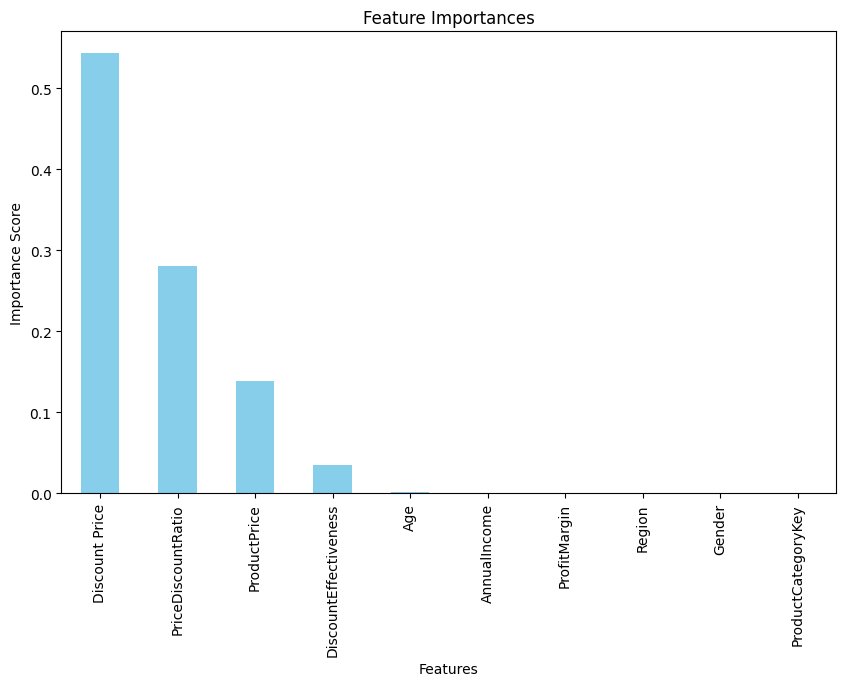

In [89]:
# Assuming `importances` contains the feature importance values from the best model
# and `X` is the DataFrame with feature names
# Get feature names and importance values

feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

#Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Forecasting Future Sales and Profit by Time Series

In [90]:
sales_data.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,...,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Full Name,Domain Name,DiscountMargin,Age,ProfitMargin,DiscountedPrice,PriceDiscountRatio,DiscountEffectiveness,LogProductPrice,ProductPrice_squared,DiscountMargin_squared,ProductPrice_DiscountMargin
0,1/1/2020,9/21/2019,SO45080,332,14657,1,1,1,1,Bikes,2,Road Bikes,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.10,...,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works,10.00,66,40.90,629.19,0.01,6990.98,6.55,488738.29,100.00,6990.98
1,1/9/2022,10/1/2021,SO61768,352,14657,1,1,1,1,Bikes,1,Mountain Bikes,BK-M68S-38,"Mountain-200 Silver, 38",Mountain-200,Serious back-country riding. Perfect for all l...,Silver,U,1117.86,2071.42,...,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works,10.00,66,46.03,1864.28,0.00,20714.20,7.64,4290779.16,100.00,20714.20
2,1/9/2022,12/20/2021,SO61768,215,14657,1,3,1,4,Accessories,31,Helmets,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,Unknown,12.03,33.64,...,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works,10.00,66,64.25,30.28,0.30,336.44,3.55,1131.93,100.00,336.44
3,1/9/2022,11/22/2021,SO61768,485,14657,1,2,2,4,Accessories,30,Fenders,FE-6654,Fender Set - Mountain,Fender Set - Mountain,Clip-on fenders fit most mountain bikes.,Unknown,Unknown,8.22,21.98,...,M,M,john48@adventure-works.com,80000,1,Partial College,Skilled Manual,N,Mr. John Thomas,Adventure Works,10.00,66,62.60,19.78,0.45,219.80,3.13,483.12,100.00,219.80
4,2/6/2020,10/12/2019,SO45383,332,14734,1,1,1,1,Bikes,2,Road Bikes,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.10,...,M,M,kevin38@adventure-works.com,30000,1,Bachelors,Skilled Manual,Y,Mr. Kevin Edwards,Adventure Works,10.00,71,40.90,629.19,0.01,6990.98,6.55,488738.29,100.00,6990.98


In [ ]:
# Convert 'OrderDate' to datetime
sales_data['OrderDate'] = pd.to_datetime(sales_data['OrderDate'])
sales_data.set_index('OrderDate', inplace=True)

<ipython-input-102-bc371bc3ba3f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.groupby([pd.Grouper(freq='M'), 'CategoryName']).agg({
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as start

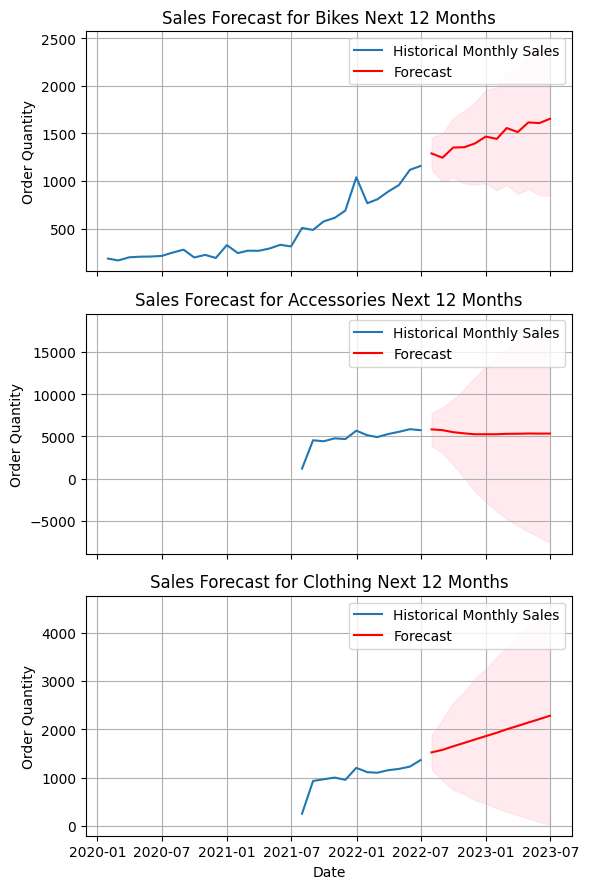

In [102]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate data by month and category
monthly_sales = sales_data.groupby([pd.Grouper(freq='M'), 'CategoryName']).agg({
    'OrderQuantity': 'sum',
    'ProductPrice': 'sum'
}).reset_index()

# Calculate total sales revenue
monthly_sales['TotalRevenue'] = monthly_sales['OrderQuantity'] * monthly_sales['ProductPrice']

# Identify unique categories
unique_categories = sales_data['CategoryName'].unique()

# Initialize a figure for plotting
fig, axes = plt.subplots(nrows=len(unique_categories), ncols=1, figsize=(6, 3 * len(unique_categories)), sharex=True)

# Loop through each category to prepare data, fit model, and forecast
for index, category in enumerate(unique_categories):
    # Prepare time series data
    category_sales = monthly_sales[monthly_sales['CategoryName'] == category].set_index('OrderDate')['OrderQuantity']

    # Fit ARIMA model
    model = ARIMA(category_sales, order=(3, 1, 3))
    model_fit = model.fit()

    # Forecast the next 12 months
    forecast = model_fit.get_forecast(steps=12)
    forecast_df = forecast.summary_frame()

    # Convert forecast data to numpy arrays
    forecast_mean = np.array(forecast_df['mean'].astype(float))
    forecast_mean_ci_lower = np.array(forecast_df['mean_ci_lower'].astype(float))
    forecast_mean_ci_upper = np.array(forecast_df['mean_ci_upper'].astype(float))
    forecast_dates = np.array(pd.date_range(category_sales.index[-1], periods=13, freq='M')[1:])

    # Plotting historical data and forecast with confidence intervals
    axes[index].plot(category_sales.index, category_sales, label='Historical Monthly Sales')
    axes[index].plot(forecast_dates, forecast_mean, label='Forecast', color='red')
    axes[index].fill_between(forecast_dates, forecast_mean_ci_lower, forecast_mean_ci_upper, color='pink', alpha=0.3)
    axes[index].set_title(f'Sales Forecast for {category} Next 12 Months')
    axes[index].set_ylabel('Order Quantity')
    axes[index].legend()
    axes[index].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

<ipython-input-104-c30677170581>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = sales_data.groupby([pd.Grouper(freq='M'), 'CategoryName']).agg({
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-104-c30677170581>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = np.array(pd.date_

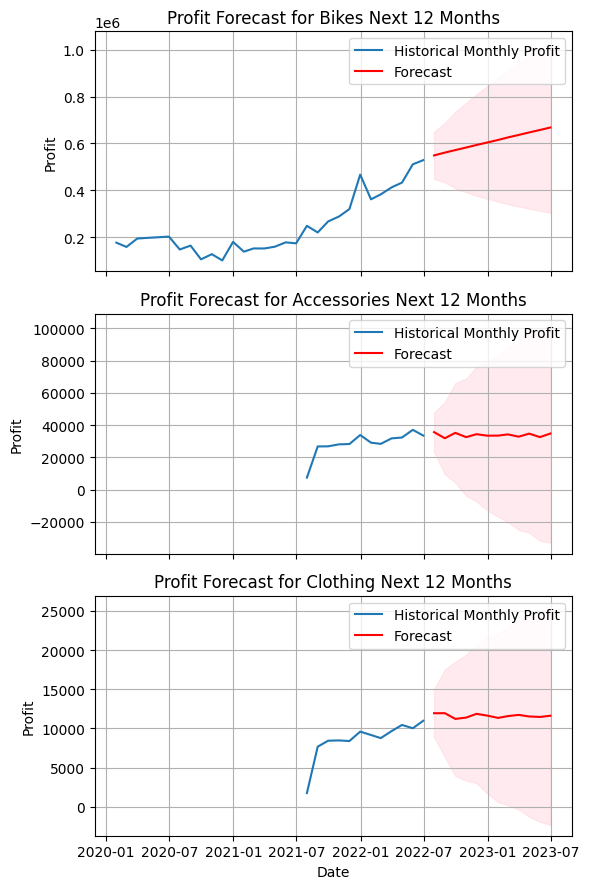

In [104]:
# profit forecasting

# Calculate profit
sales_data['Profit'] = sales_data['Discount Price'] - sales_data['ProductCost']  # Adjust according to your data structure

# Aggregate data by month and category
monthly_profit = sales_data.groupby([pd.Grouper(freq='M'), 'CategoryName']).agg({
    'Profit': 'sum'
}).reset_index()

# Identify unique categories
unique_categories = sales_data['CategoryName'].unique()

# Initialize a figure for plotting
fig, axes = plt.subplots(nrows=len(unique_categories), ncols=1, figsize=(6, 3 * len(unique_categories)), sharex=True)

# Loop through each category to prepare data, fit model, and forecast
for index, category in enumerate(unique_categories):
    # Prepare time series data
    category_profit = monthly_profit[monthly_profit['CategoryName'] == category].set_index('OrderDate')['Profit']

    # Fit ARIMA model
    model = ARIMA(category_profit, order=(2, 1, 3))
    model_fit = model.fit()

    # Forecast the next 12 months
    forecast = model_fit.get_forecast(steps=12)
    forecast_df = forecast.summary_frame()

    # Convert forecast data to numpy arrays
    forecast_mean = np.array(forecast_df['mean'].astype(float))
    forecast_mean_ci_lower = np.array(forecast_df['mean_ci_lower'].astype(float))
    forecast_mean_ci_upper = np.array(forecast_df['mean_ci_upper'].astype(float))
    forecast_dates = np.array(pd.date_range(category_profit.index[-1], periods=13, freq='M')[1:])

    # Plotting historical data and forecast with confidence intervals
    axes[index].plot(category_profit.index, category_profit, label='Historical Monthly Profit')
    axes[index].plot(forecast_dates, forecast_mean, label='Forecast', color='red')
    axes[index].fill_between(forecast_dates, forecast_mean_ci_lower, forecast_mean_ci_upper, color='pink', alpha=0.3)
    axes[index].set_title(f'Profit Forecast for {category} Next 12 Months')
    axes[index].set_ylabel('Profit')
    axes[index].legend()
    axes[index].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()